In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import altair as alt
import bokeh.plotting as bp
from bokeh.io import output_notebook, show
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [20]:
# Load dataset
data = pd.read_csv('/content/stock_market_data_large.csv')

In [21]:
# Data preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.dropna()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])


In [22]:
# Prepare data for CNN
X, y = [], []
window_size = 10
for i in range(len(data_scaled) - window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size, 3])  # Predicting 'Close' price
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Build CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, X.shape[2])),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0085 - mae: 0.0608 - val_loss: 2.7109e-04 - val_mae: 0.0129
Epoch 2/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0030 - mae: 0.0370 - val_loss: 1.6547e-04 - val_mae: 0.0102
Epoch 3/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0023 - mae: 0.0315 - val_loss: 6.1501e-04 - val_mae: 0.0199
Epoch 4/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0018 - mae: 0.0282 - val_loss: 1.4455e-04 - val_mae: 0.0096
Epoch 5/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0017 - mae: 0.0284 - val_loss: 3.7220e-04 - val_mae: 0.0149
Epoch 6/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - mae: 0.0273 - val_loss: 2.0413e-04 - val_mae: 0.0118
Epoch 7/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0015 - mae: 0.0271 - val_loss: 3.3205e-04 - val_mae: 0.0152
Epoch 8/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0015 - mae: 0.0267 - val_loss: 2.7476e-04 - val_mae: 0.0133
Epoch 9/10
682/682 ━━━━━

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


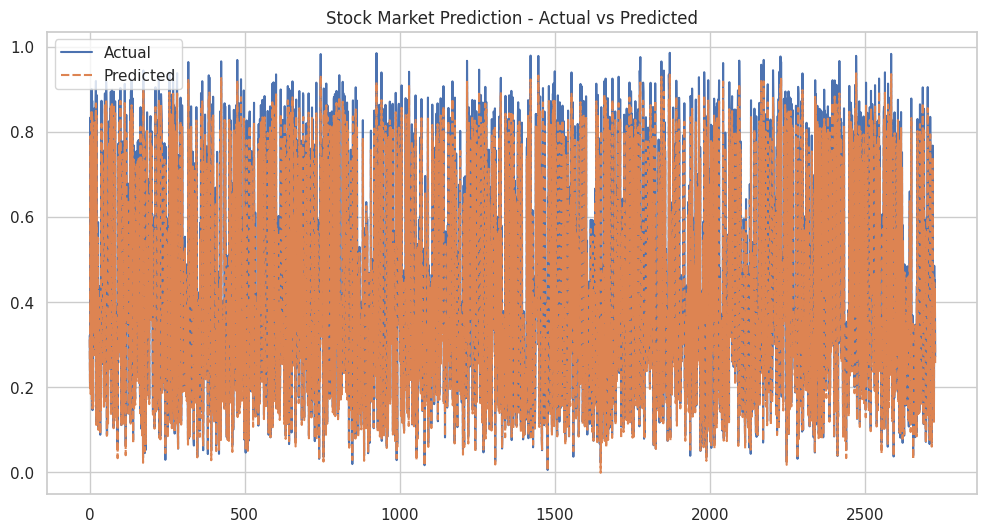

In [25]:
# Predict and visualize
y_pred = model.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
plt.figure(figsize=(12,6))
sns.lineplot(data=df_pred)
plt.title("Stock Market Prediction - Actual vs Predicted")
plt.show()

In [26]:
# Interactive visualization
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(y=y_pred.flatten(), mode='lines', name='Predicted'))
fig.update_layout(title="Stock Market Prediction", xaxis_title="Time", yaxis_title="Close Price")
fig.show()


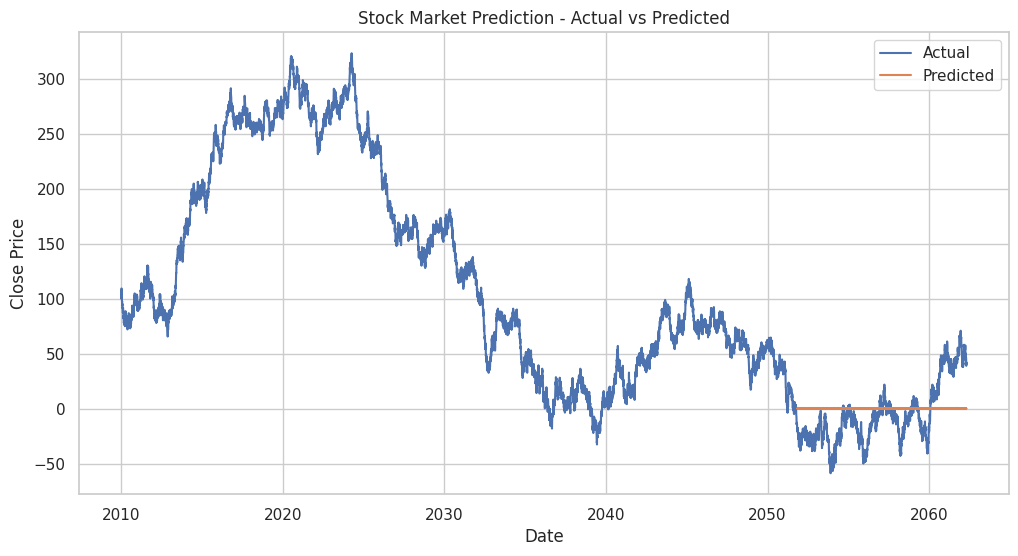

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index[-len(y_pred):], y_pred, label='Predicted')
plt.title('Stock Market Prediction - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
fig = px.scatter(df_pred, x='Actual', y='Predicted', trendline='ols')
fig.update_layout(title='Actual vs Predicted - Scatter Plot',
                  xaxis_title='Actual Close Price',
                  yaxis_title='Predicted Close Price')
fig.show()